In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
# Create a new set of 2,000 random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Adding latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import from citipy.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

husavik is
belushya guba ru
kapaa us
punta arenas cl
mataura pf
kapaa us
tumannyy ru
atuona pf
faanui pf
arraial do cabo br
dikson ru
fortuna us
tuktoyaktuk ca
petropavlovsk-kamchatskiy ru
albany au
alta floresta br
evensk ru
tiksi ru
katobu id
esperance au
thompson ca
lovozero ru
pisco pe
atuona pf
vostok ru
shawville ca
kayerkan ru
mhango tz
bluff nz
punta arenas cl
pleasant point nz
ancud cl
qaanaaq gl
skalistyy ru
dikson ru
mahebourg mu
edd er
saint-philippe re
yumen cn
hermanus za
new glasgow ca
plaeng yao th
rikitea pf
taolanaro mg
arraial do cabo br
oriximina br
puerto ayora ec
busselton au
huambo ao
hervey bay au
faanui pf
hilo us
danshui cn
kavieng pg
torbay ca
high level ca
inhambane mz
hermanus za
mataura pf
amderma ru
cockburn town tc
cidreira br
hermanus za
port elizabeth za
bluff nz
dolbeau ca
eenhana na
cockburn town bs
dubbo au
rikitea pf
albany au
barentsburg sj
ribeira grande pt
pangody ru
maturin ve
pisco pe
kapaa us
jamui in
ushuaia ar
port alfred za
busselton au
ma

hermanus za
hilo us
atuona pf
dzhida ru
cape town za
yellowknife ca
kieta pg
bethel us
waingapu id
chokurdakh ru
hilo us
ribeira grande pt
oak harbor us
ahuimanu us
illoqqortoormiut gl
bluff nz
nizhneyansk ru
vaini to
vaini to
saint-philippe re
lebu cl
souillac mu
lebu cl
rikitea pf
smithers ca
tsihombe mg
ponta delgada pt
punta arenas cl
hilo us
thompson ca
punta arenas cl
atuona pf
buraydah sa
sentyabrskiy ru
torbay ca
rikitea pf
avera pf
bethel us
bluff nz
punta arenas cl
heihe cn
yarada in
yellowknife ca
riyadh sa
ponta do sol cv
vila franca do campo pt
puerto ayora ec
torbay ca
butaritari ki
mahebourg mu
coquimbo cl
amderma ru
hasaki jp
nizhneyansk ru
mahebourg mu
albany au
rikitea pf
ushuaia ar
kibre mengist et
avarua ck
illoqqortoormiut gl
shorapur in
yirol sd
vardo no
cayenne gf
bluff nz
punta arenas cl
hermanus za
butaritari ki
tasiilaq gl
kruisfontein za
praia da vitoria pt
tocopilla cl
cape town za
albany au
batagay-alyta ru
ushuaia ar
sisimiut gl
mildura au
dikson ru
mareeb

tomatlan mx
georgetown sh
mogocha ru
amapa br
preobrazheniye ru
mataura pf
tiksi ru
ponta do sol cv
chuy uy
iranshahr ir
bluff nz
vao nc
new norfolk au
jamestown sh
kahului us
tremedal br
zhuhai cn
dudinka ru
grand gaube mu
atuona pf
rikitea pf
ulagan ru
ushuaia ar
busselton au
grand river south east mu
chicama pe
tasiilaq gl
bandarbeyla so
hobart au
nipawin ca
hobart au
nikolskoye ru
touros br
saint-philippe re
kapaa us
busselton au
grafton us
korla cn
klyuchi ru
kyshtovka ru
gidole et
port alfred za
iqaluit ca
ribeira grande pt
kloulklubed pw
puerto ayora ec
normandin ca
saint-philippe re
thompson ca
hilo us
nizhneyansk ru
roebourne au
houma us
bone id
punta arenas cl
ushuaia ar
el mahalla el kubra eg
broome au
ponta do sol cv
hermanus za
ixtapa mx
upernavik gl
mugur-aksy ru
belushya guba ru
luderitz na
linkoping se
ilulissat gl
qiongshan cn
constantine dz
palabuhanratu id
saint-philippe re
san luis mx
porbandar in
isangel vu
longyearbyen sj
ponta do sol cv
yulara au
rio gallegos ar


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

769

In [7]:
# Import the requests library.
import requests

# Import the API key.
import sys
sys.path.append('../')
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d743ae157c975fc4cc5737c8a844c283


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Current Description": weather_description})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | alta floresta
Processing Record 16 of Set 1 | evensk
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | katobu
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | lovozero
Processing 

KeyboardInterrupt: 

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Husavik,66.0449,-17.3389,39.07,96,100,7.99,IS,2022-03-24 12:52:28,overcast clouds
1,Kapaa,22.0752,-159.3190,72.19,78,40,24.16,US,2022-03-24 12:52:28,light rain
2,Punta Arenas,-53.1500,-70.9167,46.51,76,20,17.27,CL,2022-03-24 12:52:29,few clouds
3,Mataura,-46.1927,168.8643,43.43,90,0,2.59,NZ,2022-03-24 12:42:48,clear sky
4,Atuona,-9.8000,-139.0333,79.00,80,100,18.25,PF,2022-03-24 12:52:29,overcast clouds
5,Faanui,-16.4833,-151.7500,79.54,76,34,9.98,PF,2022-03-24 12:52:29,light rain
6,Arraial Do Cabo,-22.9661,-42.0278,82.26,61,0,17.27,BR,2022-03-24 12:52:29,clear sky
7,Dikson,73.5069,80.5464,12.94,87,100,18.81,RU,2022-03-24 12:42:52,overcast clouds
8,Fortuna,40.5982,-124.1573,47.93,97,100,6.91,US,2022-03-24 12:52:30,overcast clouds
9,Tuktoyaktuk,69.4541,-133.0374,-22.31,98,37,8.01,CA,2022-03-24 12:52:30,scattered clouds


In [13]:
city_data_df = city_data_df[["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]]

city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Husavik,IS,66.0449,-17.3389,39.07,96,100,7.99,overcast clouds
1,Kapaa,US,22.0752,-159.3190,72.19,78,40,24.16,light rain
2,Punta Arenas,CL,-53.1500,-70.9167,46.51,76,20,17.27,few clouds
3,Mataura,NZ,-46.1927,168.8643,43.43,90,0,2.59,clear sky
4,Atuona,PF,-9.8000,-139.0333,79.00,80,100,18.25,overcast clouds
5,Faanui,PF,-16.4833,-151.7500,79.54,76,34,9.98,light rain
6,Arraial Do Cabo,BR,-22.9661,-42.0278,82.26,61,0,17.27,clear sky
7,Dikson,RU,73.5069,80.5464,12.94,87,100,18.81,overcast clouds
8,Fortuna,US,40.5982,-124.1573,47.93,97,100,6.91,overcast clouds
9,Tuktoyaktuk,CA,69.4541,-133.0374,-22.31,98,37,8.01,scattered clouds


In [14]:
# Create the output file (CSV).
output_data_file = "../Weather_Database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


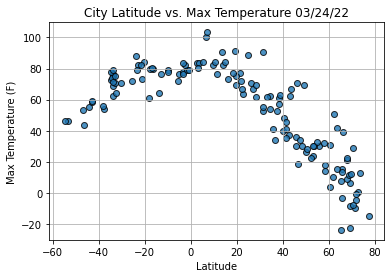

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Database/Fig1.png")

# Show plot.
plt.show()

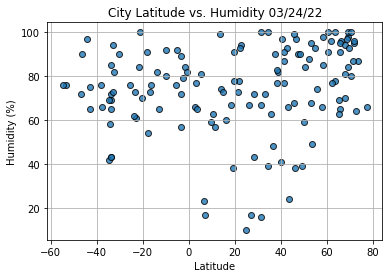

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig2.png")
# Show plot.
plt.show()


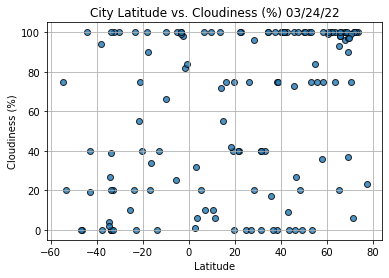

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig3.png")
# Show plot.
plt.show()

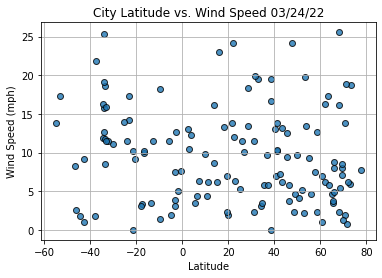

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather_Database/Fig4.png")
# Show plot.
plt.show()